In [82]:
import pandas as pd
from matplotlib import pyplot as plt

In [83]:
import numpy as np

In [84]:
df = pd.read_csv('prop_exp1.csv').iloc[:, :4]
df.columns = ['T', 'F1', 'F2', 'F']
df

,T,F1,F2,F
0,0.000,-0.463081,0.054672,0.408409
1,0.005,-0.458885,0.042053,0.416832
2,0.010,-0.465172,0.046257,0.418915
3,0.015,-0.458885,0.044159,0.414726
4,0.020,-0.465172,0.033646,0.431526
...,...,...,...,...
1375,6.875,-0.180199,-0.008415,0.188614
1376,6.880,-0.178108,-0.012619,0.190727
1377,6.885,-0.182297,-0.012619,0.194916
1378,6.890,-0.182297,-0.006310,0.188606


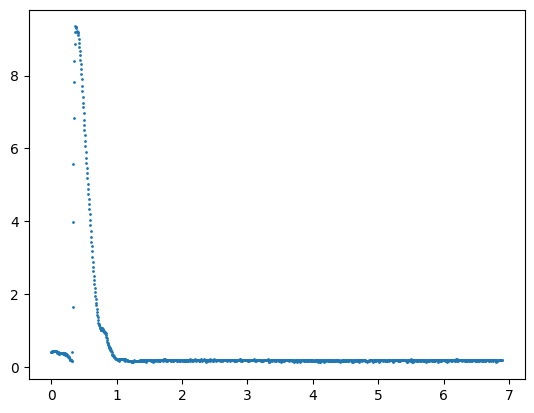

In [85]:
plt.scatter(df['T'], df['F'], s=1)
# plt.xlim(0.31, 1.25)
plt.show()

In [86]:
def find_bg(df, ts, te):
    df = df.copy()
    df = df[(df['T'] >= ts) & (df['T'] <= te)]
    # df['bg'] = df['F'].rolling(window=100).mean()
    return df['F'].mean()

In [87]:
def find_br(df_n, tp):
    st = df_n[(df_n['T'] < tp) & (df_n['F'] < 0)].index[-1]
    en = df_n[(df_n['T'] > tp) & (df_n['F'] < 0)].index[0]
    return st, en

In [88]:
find_bg(df, 2, 7)#.plot(x='T', y='bg')

0.17938433274693877

In [89]:
df_norm = df.copy()
df_norm['F'] -= find_bg(df, 2, 7)

In [90]:
find_br(df_norm, 0.7)

(64, 206)

In [91]:
df_crop = df.copy()
df_crop = df_crop.iloc[find_br(df_norm, 0.7)[0]:find_br(df_norm, 0.7)[1]]

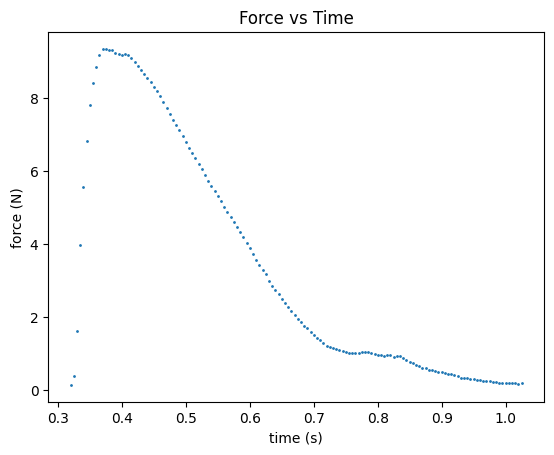

In [92]:
plt.scatter(df_crop['T'], df_crop['F'], s=1)
plt.xlabel("time (s)")
plt.ylabel("force (N)")
plt.title("Force vs Time")

plt.show()

In [93]:
df_crop["F"] -= df_crop.sort_values('F', ascending=True).iloc[0, 3]
df_crop["F"]

64     0.000000
65     0.256569
66     1.486824
67     3.822571
68     5.418716
         ...   
201    0.056908
202    0.056908
203    0.048508
204    0.035896
205    0.044289
Name: F, Length: 142, dtype: float64

In [94]:
df_crop.sort_values('T', ascending=True).iloc[0, 0]

0.32

In [101]:
df_crop["T"] -= df_crop.sort_values('T', ascending=True).iloc[0, 0]
df_crop["T"]

64     0.000
65     0.005
66     0.010
67     0.015
68     0.020
       ...  
201    0.685
202    0.690
203    0.695
204    0.700
205    0.705
Name: T, Length: 142, dtype: float64

In [96]:
df_inter = df_crop[["T", "F"]]
# df_inter[df_inter["T"] == 0.323]["F"] = pd.NA
df_inter.loc[-1] = [.323, pd.NA]
print(df_inter)
print(df_inter[df_inter["T"] == 0.323])
df_inter = df_inter.set_index('T').interpolate(method='linear').reset_index()
df_inter[df_inter["T"] == 0.323]

          T         F
 64   0.320  0.000000
 65   0.325  0.256569
 66   0.330  1.486824
 67   0.335  3.822571
 68   0.340  5.418716
...     ...       ...
 202  1.010  0.056908
 203  1.015  0.048508
 204  1.020  0.035896
 205  1.025  0.044289
-1    0.323       NaN

[143 rows x 2 columns]
        T   F
-1  0.323 NaN


C:\Users\levta\AppData\Local\Temp\ipykernel_16240\1786107588.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_inter.loc[-1] = [.323, pd.NA]
C:\Users\levta\AppData\Local\Temp\ipykernel_16240\1786107588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inter.loc[-1] = [.323, pd.NA]


,T,F
142,0.323,0.044289


<Axes: xlabel='T'>

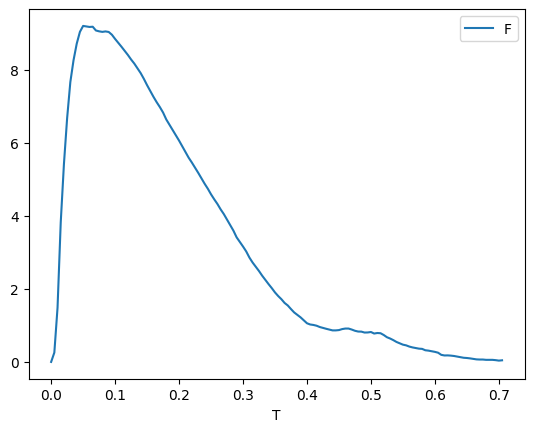

In [102]:
df_crop[["T", "F"]].plot(x='T', y='F')

In [105]:
df_res = df_crop[["T", "F"]]
df_res.reset_index(drop=True, inplace=True)
df_res

,T,F
0,0.000,0.000000
1,0.005,0.256569
2,0.010,1.486824
3,0.015,3.822571
4,0.020,5.418716
...,...,...
137,0.685,0.056908
138,0.690,0.056908
139,0.695,0.048508
140,0.700,0.035896


In [106]:
df_res.to_csv("F_prop.csv", index=False)

In [98]:
df_inter.to_csv('F_prop.csv', index=False)

<Axes: xlabel='T'>

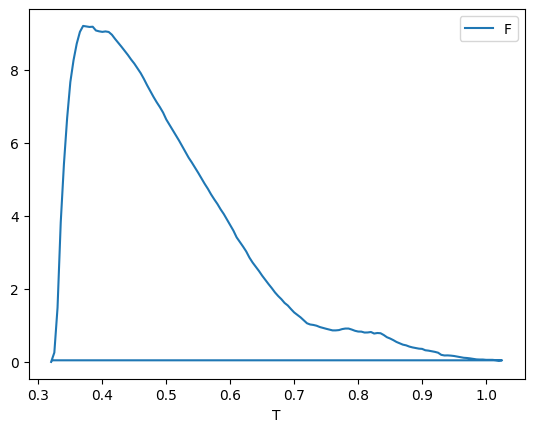

In [99]:
df_inter.plot(x='T', y='F')

In [100]:
df_inter = df_crop[["T", "F"]]
df_inter.append({"T": 0.323, "F": pd.NA}, ignore_index=True)
print(df_inter.set_index('T').interpolate(method='linear')[df_inter['T'] == 0.323])

AttributeError: 'DataFrame' object has no attribute 'append'

Series([], Name: F, dtype: float64)
0.3


ValueError: x and y must be the same size

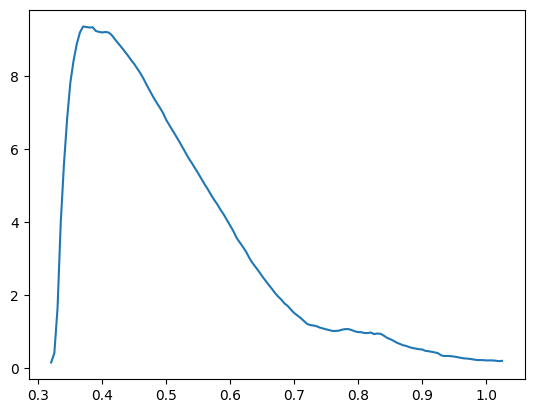

In [ ]:
# Assuming you want to plot the interpolated value of F for T = 0.3
t_value = 0.3
interpolated_value = df_inter['F'][df_inter['T'] == t_value]
print(interpolated_value)
print(t_value)

# Plot the interpolated value
plt.plot(df_inter['T'], df_inter['F'])
plt.scatter([t_value], interpolated_value, color='red')  # Highlight the specific T value
plt.xlabel("T")
plt.ylabel("F")
plt.title("Interpolated F vs T")
plt.show()

In [ ]:
df_inter['F'][df_inter['T'] == 0.3]

Series([], Name: F, dtype: float64)

In [ ]:
def norm_crop(df, te, tp):
    df = df.copy()
    df = df[df['T'] >= te]
    bg = df['F'].mean()
    print(bg)
    df_n = df.copy()
    df_n['F'] -= bg
    print(df_n)

    print(df_n[(df_n['T'] < tp) & (df_n['F'] < 1)])
    print(df_n[(df_n['T'] > tp) & (df_n['F'] < 1)])
    st = df_n[(df_n['T'] < tp) & (df_n['F'] < 1)].index[-1]
    en = df_n[(df_n['T'] > tp) & (df_n['F'] < 1)].index[0]
    df_crop = df.iloc[st:en]
    return df_crop

In [ ]:
df

,T,F1,F2,F
0,0.000,-0.463081,0.054672,0.408409
1,0.005,-0.458885,0.042053,0.416832
2,0.010,-0.465172,0.046257,0.418915
3,0.015,-0.458885,0.044159,0.414726
4,0.020,-0.465172,0.033646,0.431526
...,...,...,...,...
1375,6.875,-0.180199,-0.008415,0.188614
1376,6.880,-0.178108,-0.012619,0.190727
1377,6.885,-0.182297,-0.012619,0.194916
1378,6.890,-0.182297,-0.006310,0.188606


In [ ]:
df_crop = norm_crop(df, 2, 0.7)

0.17938433274693877
          T        F1        F2         F
400   2.000 -0.150864 -0.039955  0.011434
401   2.005 -0.152962 -0.035751  0.009329
402   2.010 -0.155060  0.000000 -0.024325
403   2.015 -0.152962 -0.014725 -0.011698
404   2.020 -0.146675 -0.023132 -0.009577
...     ...       ...       ...       ...
1375  6.875 -0.180199 -0.008415  0.009230
1376  6.880 -0.178108 -0.012619  0.011343
1377  6.885 -0.182297 -0.012619  0.015531
1378  6.890 -0.182297 -0.006310  0.009222
1379  6.895 -0.178108 -0.006310  0.005033

[980 rows x 4 columns]
Empty DataFrame
Columns: [T, F1, F2, F]
Index: []
          T        F1        F2         F
400   2.000 -0.150864 -0.039955  0.011434
401   2.005 -0.152962 -0.035751  0.009329
402   2.010 -0.155060  0.000000 -0.024325
403   2.015 -0.152962 -0.014725 -0.011698
404   2.020 -0.146675 -0.023132 -0.009577
...     ...       ...       ...       ...
1375  6.875 -0.180199 -0.008415  0.009230
1376  6.880 -0.178108 -0.012619  0.011343
1377  6.885 -0.182297 -0

IndexError: index -1 is out of bounds for axis 0 with size 0

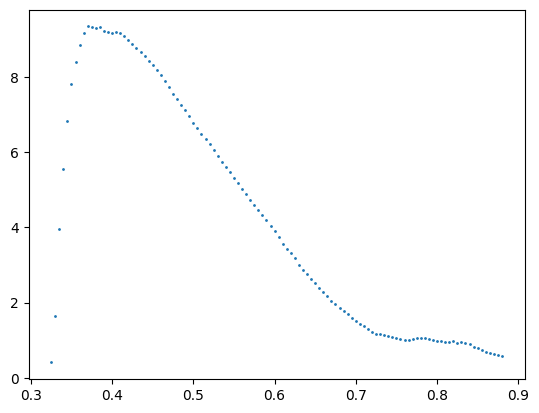

In [ ]:
plt.scatter(df_crop['T'], df_crop['F'], s=1)
plt.show()